In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import re
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 


offense=pd.read_csv('FFO_clean.csv')
defense=pd.read_csv('FFD_clean.csv')
offense.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True, axis=1)

In [2]:
offense.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate
0,2025 Abilene Christian,47.456214,20.614869,28.205128,39.616347
1,2025 Air Force,50.279107,20.779381,24.039653,37.240829
2,2025 Akron,55.272346,17.293210,32.758621,24.441341
3,2025 Alabama,56.504599,17.668644,37.049550,41.721419
4,2025 Alabama A&M,44.880677,21.762263,35.225956,37.875289


In [3]:
defense.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True, axis=1)

In [4]:
defense.head()

,Team/Year,eFGPct,TOPct,ORPct,FTRate
0,2025 Abilene Christian,53.568030,23.406179,30.112721,52.711703
1,2025 Air Force,54.512106,15.831910,28.934010,34.776229
2,2025 Akron,49.000740,17.665107,28.846154,34.196891
3,2025 Alabama,46.088539,13.717892,29.952153,30.927835
4,2025 Alabama A&M,54.434500,20.866170,37.826685,47.274207


Univariate Analysis

In [ ]:
numericalo=offense.select_dtypes(exclude='object')
for col in numericalo:
    fig, ax=plt.subplots()
    ax.boxplot(numericalo[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

In [ ]:
numericald=defense.select_dtypes(exclude='object')
for col in numericald:
    fig, ax=plt.subplots()
    ax.boxplot(numericald[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/2018382842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


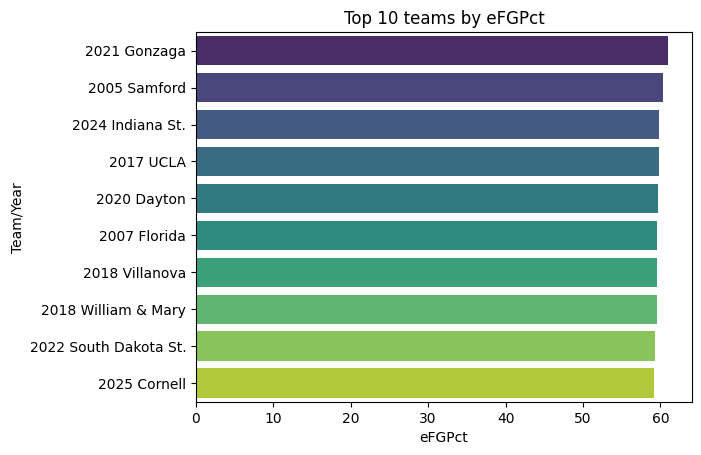

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/2018382842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


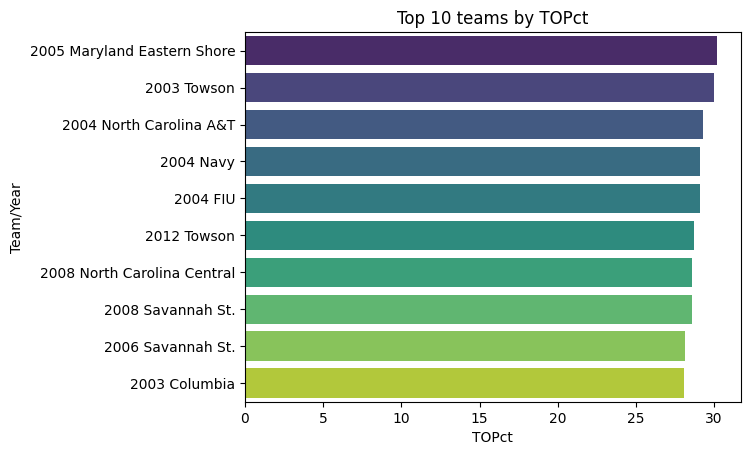

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/2018382842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


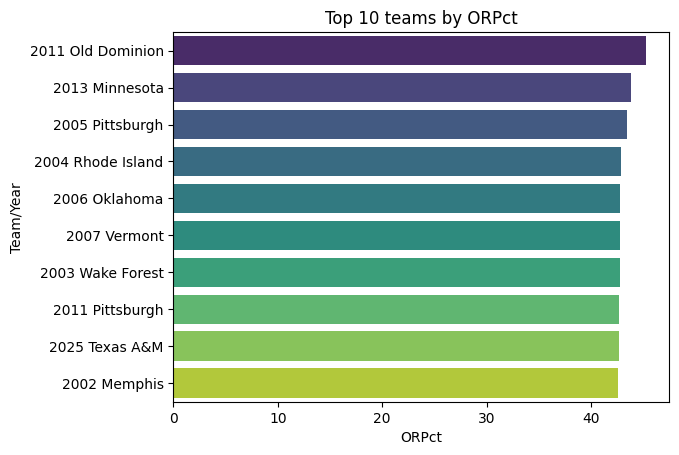

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/2018382842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


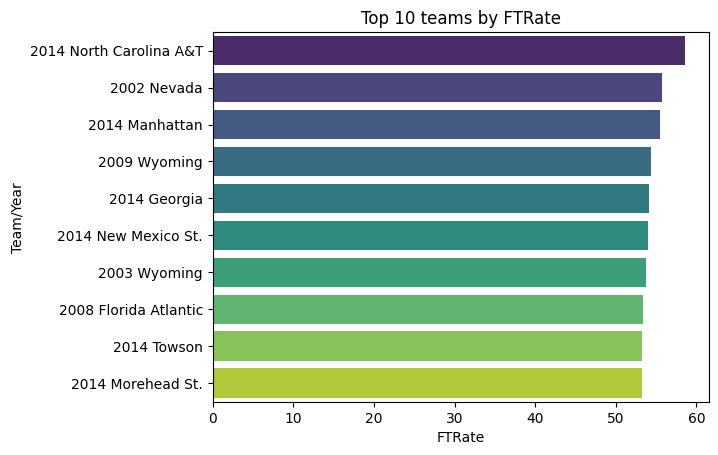

In [7]:
for col in offense.select_dtypes(include='number').columns:
    top_10=offense.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/3140627975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


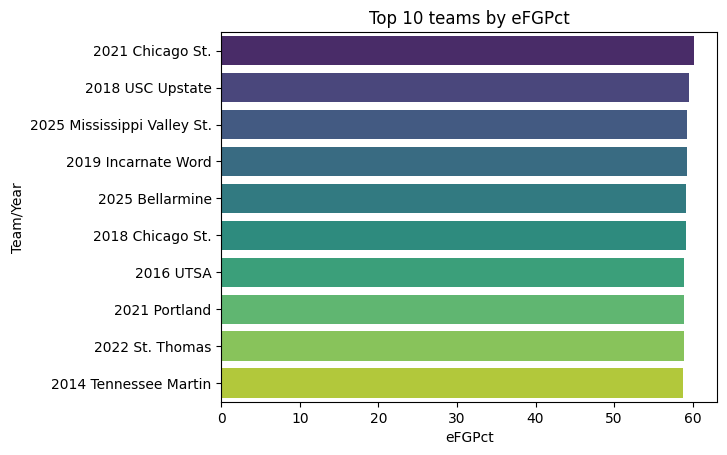

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/3140627975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


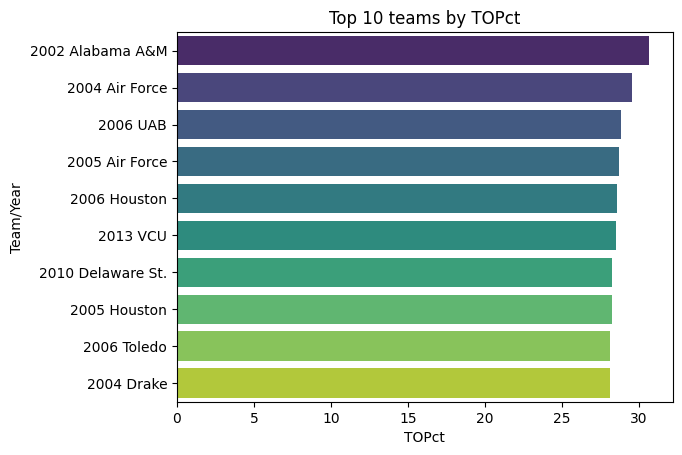

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/3140627975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


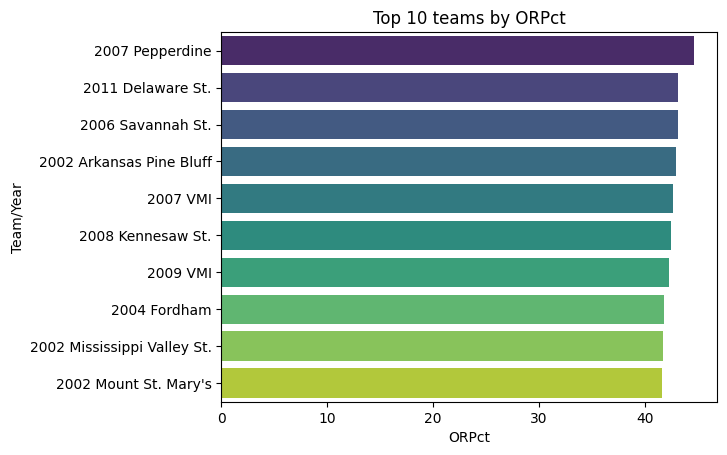

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/3140627975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


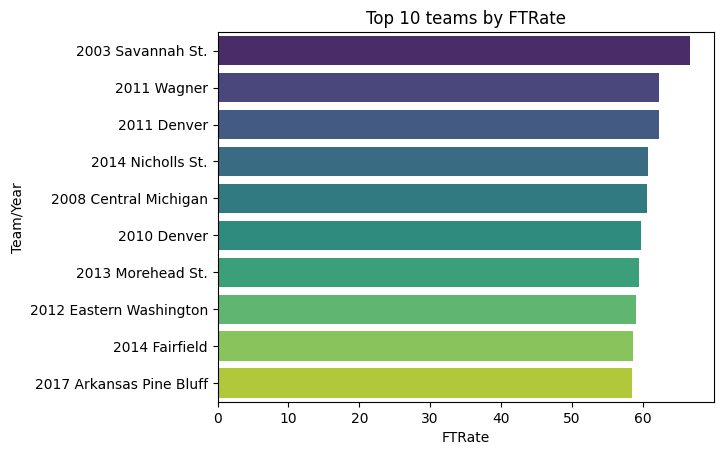

In [8]:
for col in defense.select_dtypes(include='number').columns:
    top_10=defense.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


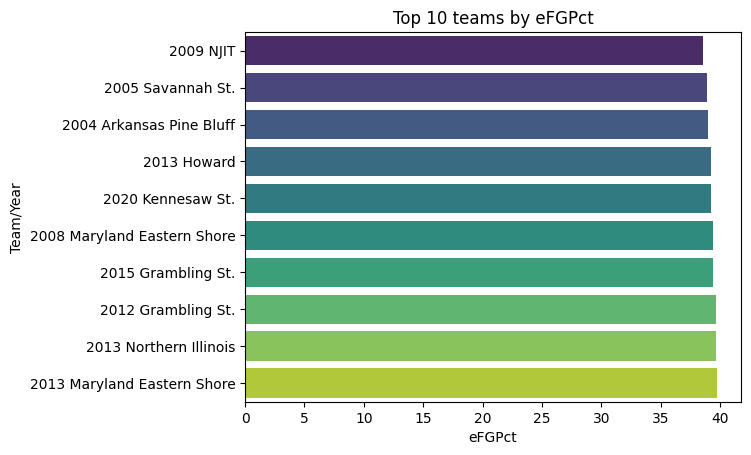

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


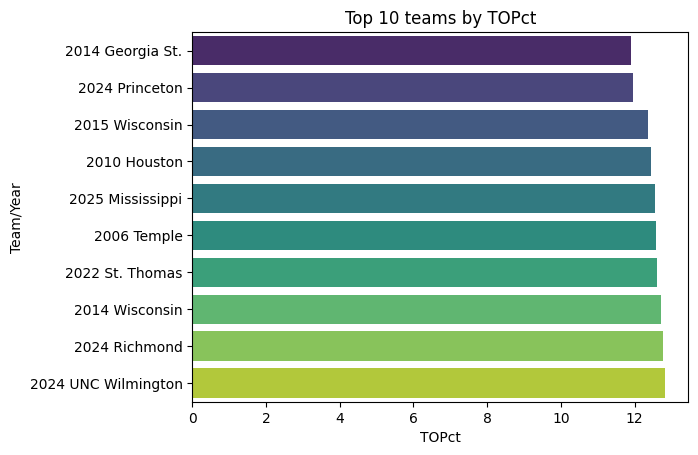

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


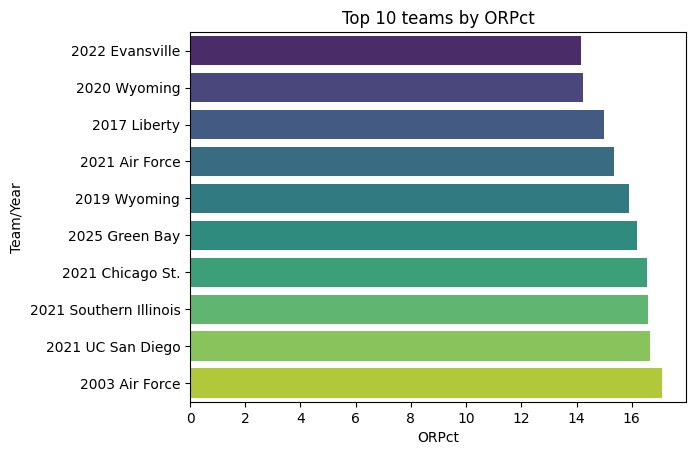

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/718168710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


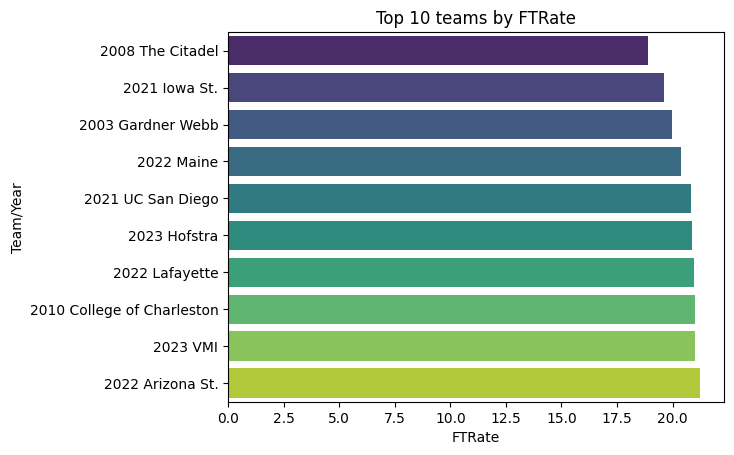

In [9]:
for col in offense.select_dtypes(include='number').columns:
    top_10=offense.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/232514864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


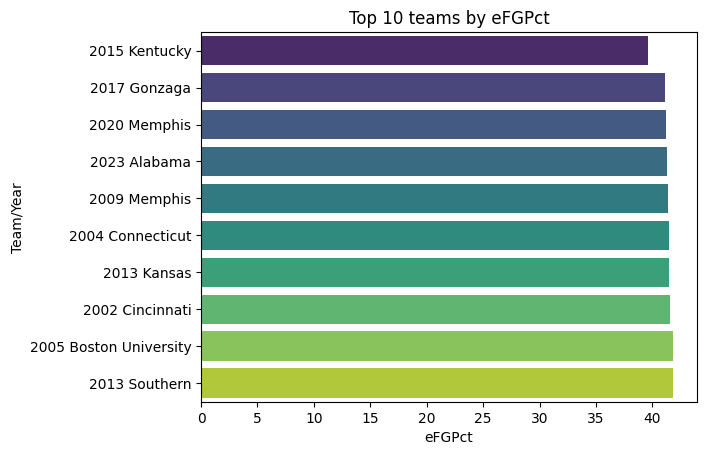

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/232514864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


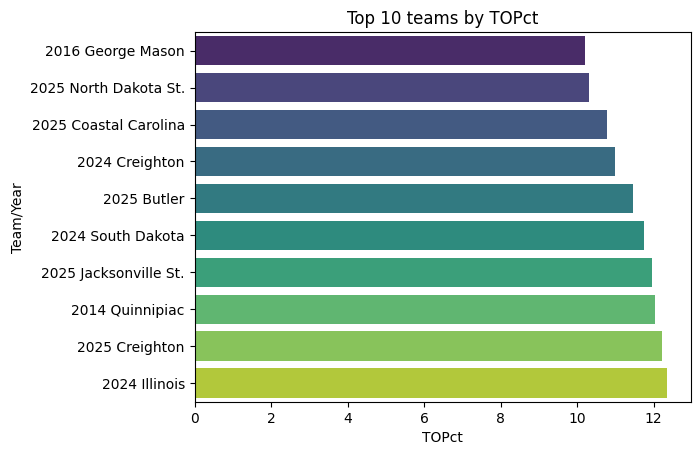

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/232514864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


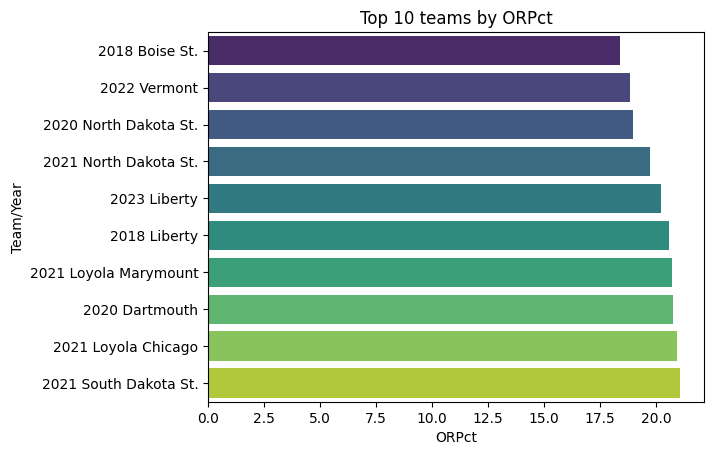

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_65942/232514864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['Team/Year'], palette='viridis')


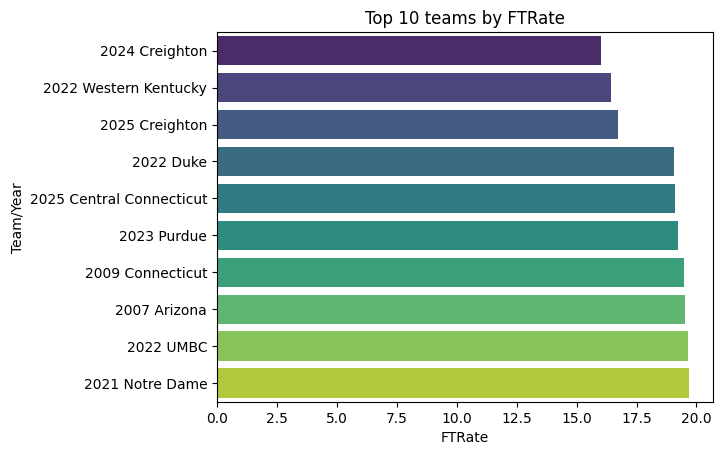

In [10]:
for col in defense.select_dtypes(include='number').columns:
    top_10=defense.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

Calculating Skewness and Kurtosis for each column in the dataset

In [11]:
numericalo.skew(axis=0, skipna=True)

eFGPct   -0.030744
TOPct     0.250551
ORPct    -0.198452
FTRate    0.172885
dtype: float64

In [12]:
numericald.skew(axis=0, skipna=True)

eFGPct    0.058319
TOPct     0.194684
ORPct    -0.009657
FTRate    0.430715
dtype: float64

Wee see that our skewness lies within the acceptable limit(-1 and 1), so we can leave our data alone on that basis.

In [13]:
numericalo.kurtosis(axis=0, skipna=True)

eFGPct    0.110374
TOPct     0.030257
ORPct    -0.116155
FTRate   -0.008258
dtype: float64

In [14]:
numericald.kurtosis(axis=0, skipna=True)

eFGPct   -0.083475
TOPct     0.039008
ORPct    -0.208071
FTRate    0.276928
dtype: float64

The same is true on the Kurtosis front; the acceptable level lies between 2 and -2, and our data lies within the limit. We can move on

Bivariate Analysis: Pearson and Spearman Correlations

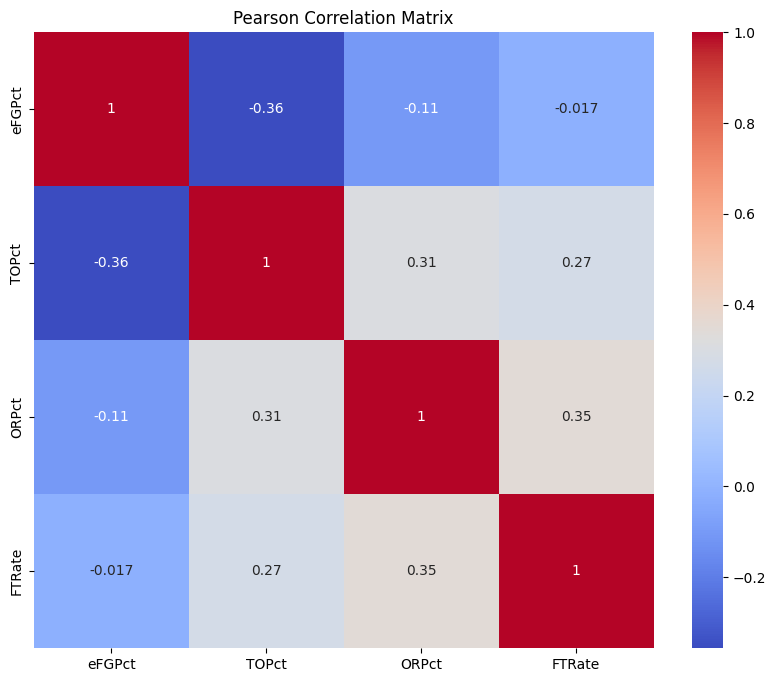

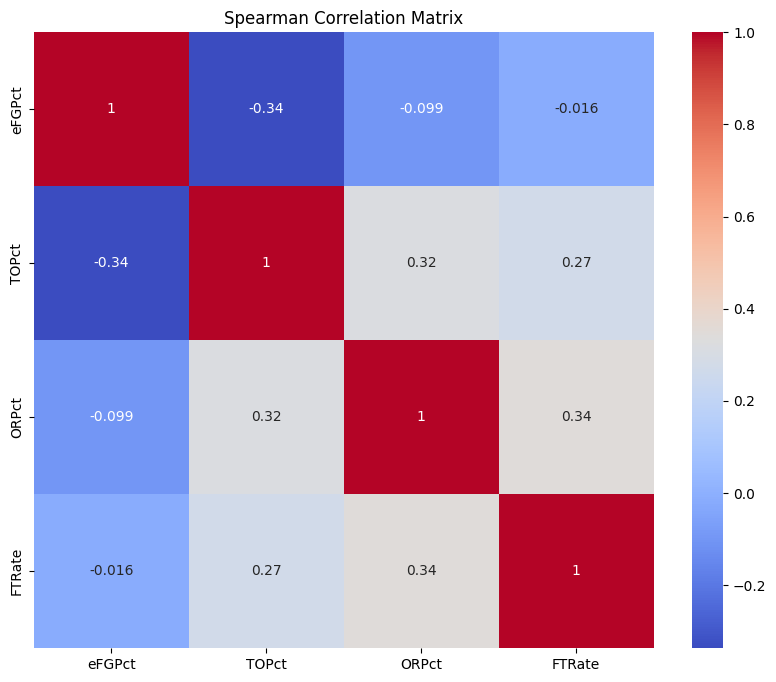

In [15]:
correlators=numericalo
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

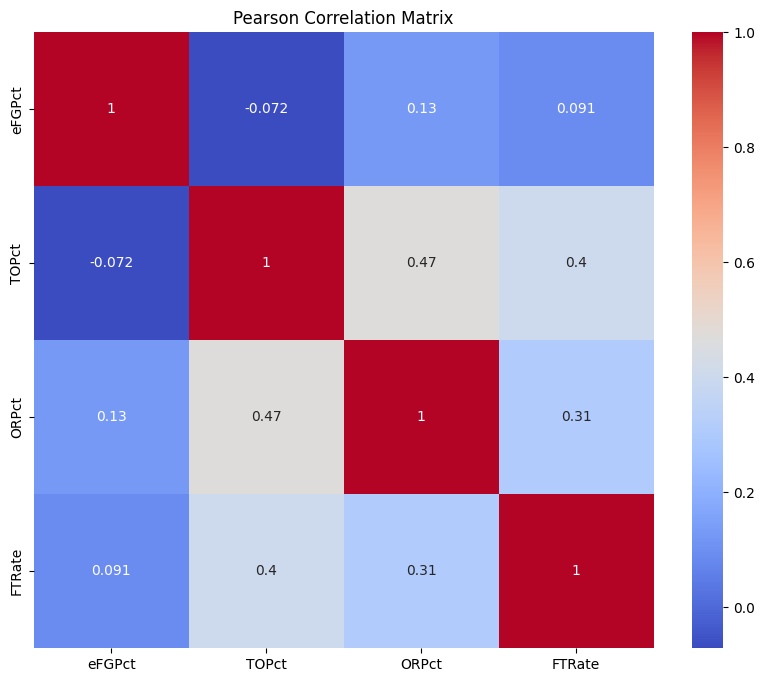

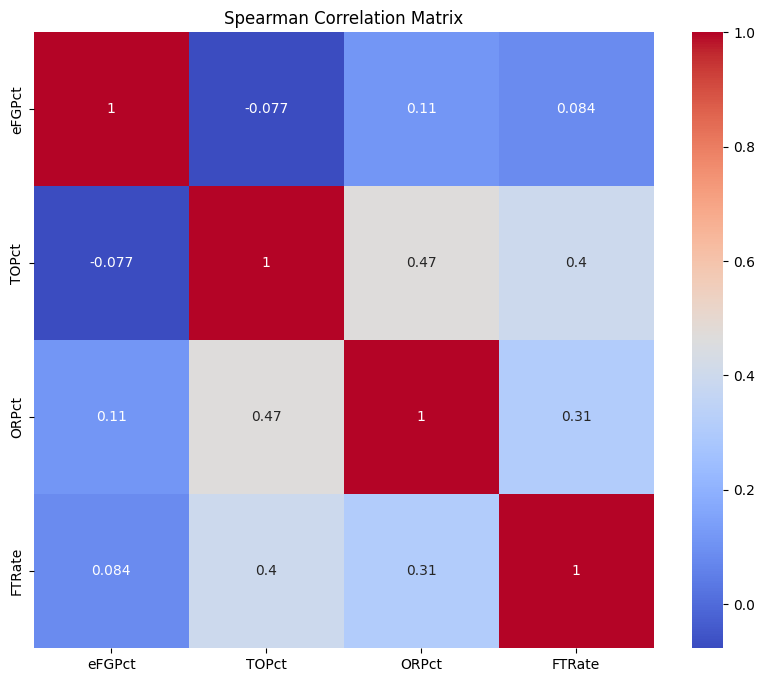

In [16]:
correlators=numericald
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Both our offensive and defensive datasets do not appear to be exceptionally correlated, but let's run our Variance Inflation Factor to confirm.

  features        VIF
0   eFGPct  57.866235
1    TOPct  56.180576
2    ORPct  57.412606
3   FTRate  51.725588


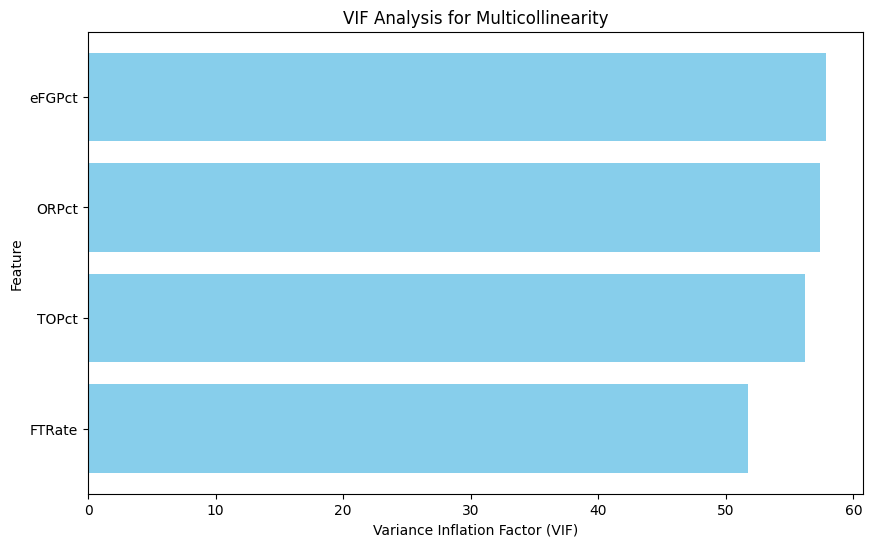

In [17]:
vif_data=pd.DataFrame()
vif_data['features']=numericalo.columns
vif_data['VIF']=[variance_inflation_factor(numericalo.values,i) for i in range(len(numericalo.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

The multicollinearity of the features are high; before we apply the data to any kind of ML algorithms, we will have to reduce dimensionality.

  features        VIF
0   eFGPct  77.837172
1    TOPct  76.363894
2    ORPct  98.891447
3   FTRate  39.609191


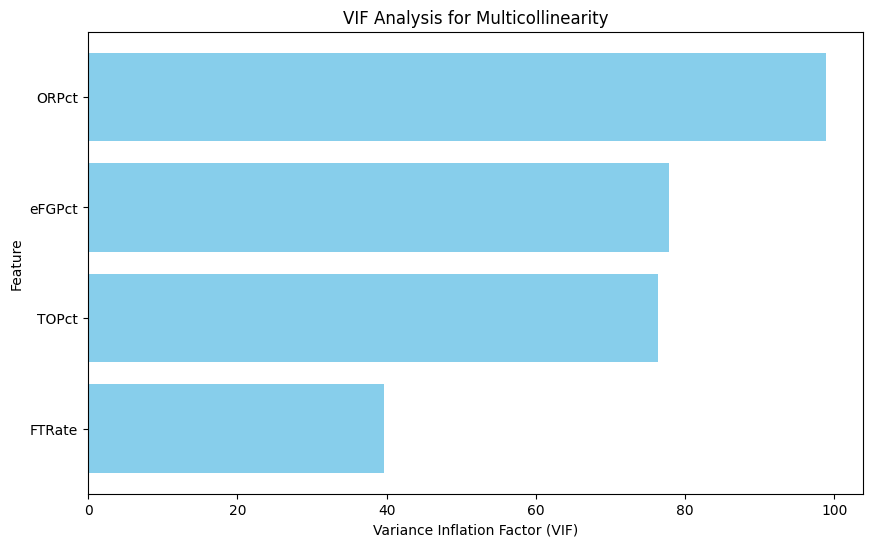

In [21]:
vif_data=pd.DataFrame()
vif_data['features']=numericald.columns
vif_data['VIF']=[variance_inflation_factor(numericald.values,i) for i in range(len(numericald.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

Same issue applies to the defensive side.

Scatterplots for TOpct vs ORPct for offense and defense

In [18]:
fig = px.scatter(
offense,
x='TOPct',
y='ORPct',
hover_name='Team/Year',
title='relationship between turnovers and offensive rebounding'
)
fig.show()

In [19]:
fig = px.scatter(
defense,
x='TOPct',
y='ORPct',
hover_name='Team/Year',
title='relationship between forced turnovers and defensive rebounding'
)
fig.show()

Multivariate Analyssis

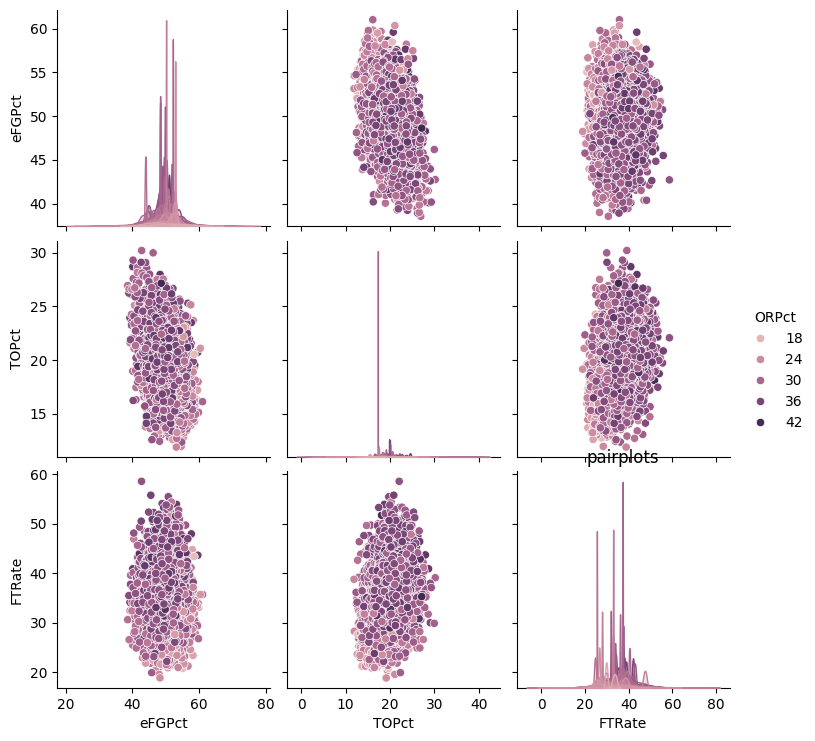

In [20]:
sns.pairplot(offense, hue='ORPct')
plt.title('pairplots')
plt.show()

Once we decide to 